In [ ]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-



# Deep Neural Networks

## Assignment
### Neural Network with :

- **Ionosphere**
- **binary-class**

In [ ]:
###-----------------
### Import Libraries
###-----------------

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from collections.abc import Callable
from typing import Literal
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
import tensorflow as tf 
%matplotlib inline

In [ ]:
# gpus = tf.config.list_physical_devices('GPU')

# try:
#     for g in gpus:
#         tf.config.experimental.set_memory_growth(g, True)
#     logical_gpus = tf.config.list_logical_devices('GPU')
#     print (len(gpus), 'Phusical GPUs', len(logical_gpus), 'Logical GPUs')
# except:
#     print ('invalid device')

In [ ]:
###----------------
### Some parameters
###----------------

inpDir = '../../input'
outDir = '../output'
subDir = 'ionosphere'
modelDir = '.../models'

RANDOM_STATE = 24 # REMEMBER: to remove at the time of promotion to production
np.random.seed(RANDOM_STATE) # Set Random Seed for reproducible  results

EPOCHS = 101 # number of epochs
ALPHA = 0.01 # learning rate
NUM_SAMPLES = 1280 # How many samples we want to generate 
NOISE = 0.2 # Noise to be introduced in the data
TEST_SIZE = 0.2
BATCH_SIZE = 32
TRAIN_SIZE = 256 # fix size of train set sot that we have batches of same size
PATIENCE = 10

# parameters for Matplotlib
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 8),
          'axes.labelsize': 'x-large',
          'axes.titlesize':'x-large',
          'xtick.labelsize':'x-large',
          'ytick.labelsize':'x-large'
         }

CMAP = 'coolwarm' # plt.cm.Spectral

plt.rcParams.update(params)

## Generate Data Set
Ionosphere Dataset

In [ ]:
data_df = pd.read_csv('ionosphere.data', header=None)
data_df.head()

In [ ]:
data_df.shape

In [ ]:
data_df.isnull().sum()

In [ ]:
data_df = data_df.rename(columns={34: 'Classification'})
data_df.columns

In [ ]:
data_df.isna().sum()

In [ ]:
data_df.head()

In [ ]:
data_df['Classification'].unique()

In [ ]:
labels = { 'g' : 'Good', 'b': 'Bad'}

In [ ]:
features_df = data_df.drop('Classification', axis = 1) # drop label col

label_df = data_df['Classification'] # labels

features_df.shape, label_df.shape

In [ ]:
label_df = pd.get_dummies(label_df)
label_df

In [ ]:
label_df.head()

In [ ]:
#  Split the data in training and test sets to measure performance of the model.
X_train, X_test, y_train, y_test = train_test_split(features_df, label_df, 
                                                    stratify=label_df,
                                                    train_size=TRAIN_SIZE, 
                                                    random_state=RANDOM_STATE )

print (X_train.shape, y_train.shape, X_test.shape, y_test.shape)

In [ ]:
scaler = StandardScaler() # get the scaler

X_train = scaler.fit_transform(X_train) # train
X_test = scaler.transform(X_test) # test

y_train = y_train.to_numpy() # array
y_test = y_test.to_numpy() # convert to array

In [ ]:
y_train

## Neural Network

Let's start with simple network. Our data has **two** features. Hence size of input layer will also be two. Lets code our output as two classes. The hidden layer could be of **any size**. One need to execute a handful of iterations to arrive at right size of hidden layer. For purpose of today's discussions, size of hidden layer is taken as shown below.
<img src='../../images/dnn_nb_s05_fig1.png' width = '500' alt = 'Session 5 Figure 1'/>

## Prepare Model:

In [ ]:
knl_reg = tf.keras.regularizers.L1(l1 = 0.01)

dor1 = 0.05

'''model = tf.keras.Sequential([
    
    tf.keras.layers.Dense(18, #activation='swish',
                          kernel_regularizer = knl_reg ),
    
    tf.keras.layers.BatchNormalization(),
    
    #Put Activation Layer here
    tf.keras.layers.Activation('relu'),
    
    tf.keras.layers.Dropout(rate=dor1, seed=RANDOM_STATE),
    
    tf.keras.layers.Dense(4)

])'''

input_layer = tf.keras.Input(shape=(34,))

x = tf.keras.layers.Dense(18, activation='relu',
                          kernel_regularizer = knl_reg ) (input_layer)

x = tf.keras.layers.Dense(9, activation='relu',
                          kernel_regularizer = knl_reg ) (x)

output_layer = tf.keras.layers.Dense(2) (x)

model = tf.keras.Model(inputs= input_layer, outputs = output_layer)

model.summary()

In [ ]:
loss_function = tf.losses.CategoricalCrossentropy(from_logits=True)

In [ ]:
X_train[:1].shape

In [ ]:
predict = model(X_train[:1])
predict

In [ ]:
predict.numpy().sum()

In [ ]:
tf.nn.softmax(predict).numpy().sum()

In [ ]:
model.compile(optimizer='adam', 
              loss=loss_function,
              metrics=['accuracy'])

In [877]:
history = model.fit(X_train, y_train, 
                    validation_data=[X_test, y_test],
                    epochs=EPOCHS,
                    verbose=2,
                    batch_size=BATCH_SIZE
                    )

8/8 - 0s - loss: 0.3926 - accuracy: 0.9688 - val_loss: 0.4618 - val_accuracy: 0.9053 - 163ms/epoch - 20ms/step
Epoch 71/101
8/8 - 0s - loss: 0.3882 - accuracy: 0.9688 - val_loss: 0.4593 - val_accuracy: 0.8947 - 119ms/epoch - 15ms/step
Epoch 72/101
8/8 - 0s - loss: 0.3858 - accuracy: 0.9688 - val_loss: 0.4573 - val_accuracy: 0.9053 - 114ms/epoch - 14ms/step
Epoch 73/101
8/8 - 0s - loss: 0.3814 - accuracy: 0.9688 - val_loss: 0.4558 - val_accuracy: 0.8947 - 137ms/epoch - 17ms/step
Epoch 74/101
8/8 - 0s - loss: 0.3777 - accuracy: 0.9688 - val_loss: 0.4544 - val_accuracy: 0.8947 - 136ms/epoch - 17ms/step
Epoch 75/101
8/8 - 0s - loss: 0.3740 - accuracy: 0.9688 - val_loss: 0.4526 - val_accuracy: 0.8947 - 133ms/epoch - 17ms/step
Epoch 76/101
8/8 - 0s - loss: 0.3711 - accuracy: 0.9688 - val_loss: 0.4503 - val_accuracy: 0.8947 - 140ms/epoch - 17ms/step
Epoch 77/101
8/8 - 0s - loss: 0.3683 - accuracy: 0.9688 - val_loss: 0.4476 - val_accuracy: 0.8947 - 145ms/epoch - 18ms/step
Epoch 78/101
8/8 - 0s

In [878]:
loss_df = pd.DataFrame(history.history)

In [879]:
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,2.080901,0.593750,2.044444,0.631579
1,2.020179,0.667969,1.990340,0.715789
2,1.963231,0.746094,1.937728,0.768421
3,1.908809,0.792969,1.887946,0.778947
4,1.858050,0.804688,1.839052,0.789474


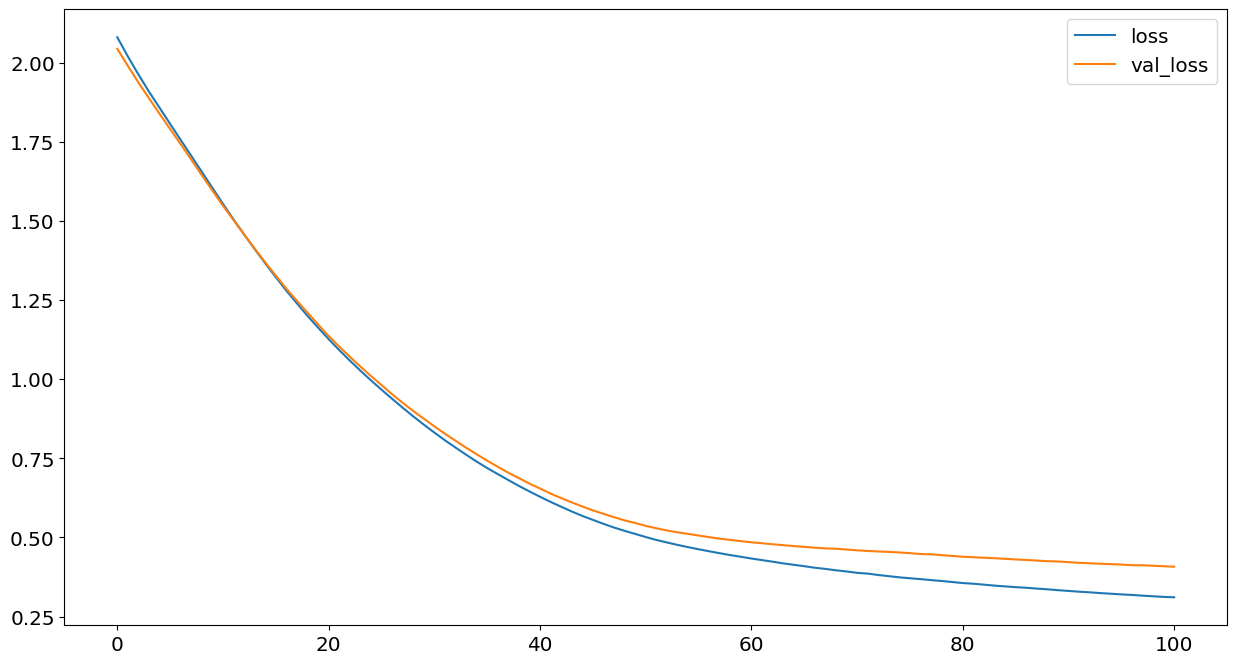

In [880]:
loss_df.plot(y = ['loss', 'val_loss']);

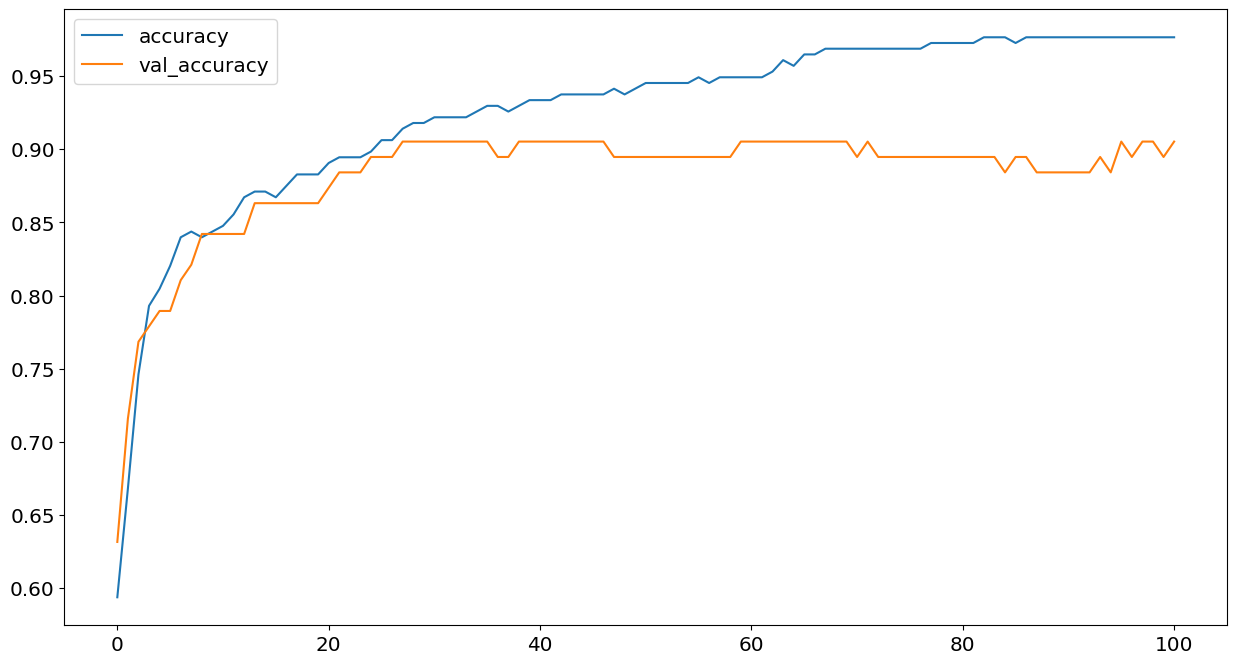

In [881]:
loss_df.plot(y = ['accuracy', 'val_accuracy']);

In [882]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 7ms/step - loss: 0.3088 - accuracy: 0.9766


[0.3087744116783142, 0.9765625]

In [883]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 21ms/step - loss: 0.4077 - accuracy: 0.9053


[0.40772077441215515, 0.9052631855010986]

In [884]:
y_pred = model.predict(X_train)

8/8 [==============================] - 0s 8ms/step


In [885]:
np.argmax(y_pred, axis = 1).shape

(256,)

In [886]:
y_train.shape

(256, 2)

In [887]:
accuracy_score (np.argmax(y_pred, axis = 1), np.argmax(y_train, axis = 1))

0.9765625

In [888]:
y_pred = model.predict(X_test)
accuracy_score (np.argmax(y_pred, axis = 1), np.argmax(y_test, axis = 1))

3/3 [==============================] - 0s 7ms/step


0.9052631578947369

In [889]:
model.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 34)]              0         
                                                                 
 dense_99 (Dense)            (None, 18)                630       
                                                                 
 dense_100 (Dense)           (None, 9)                 171       
                                                                 
 dense_101 (Dense)           (None, 2)                 20        
                                                                 
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________


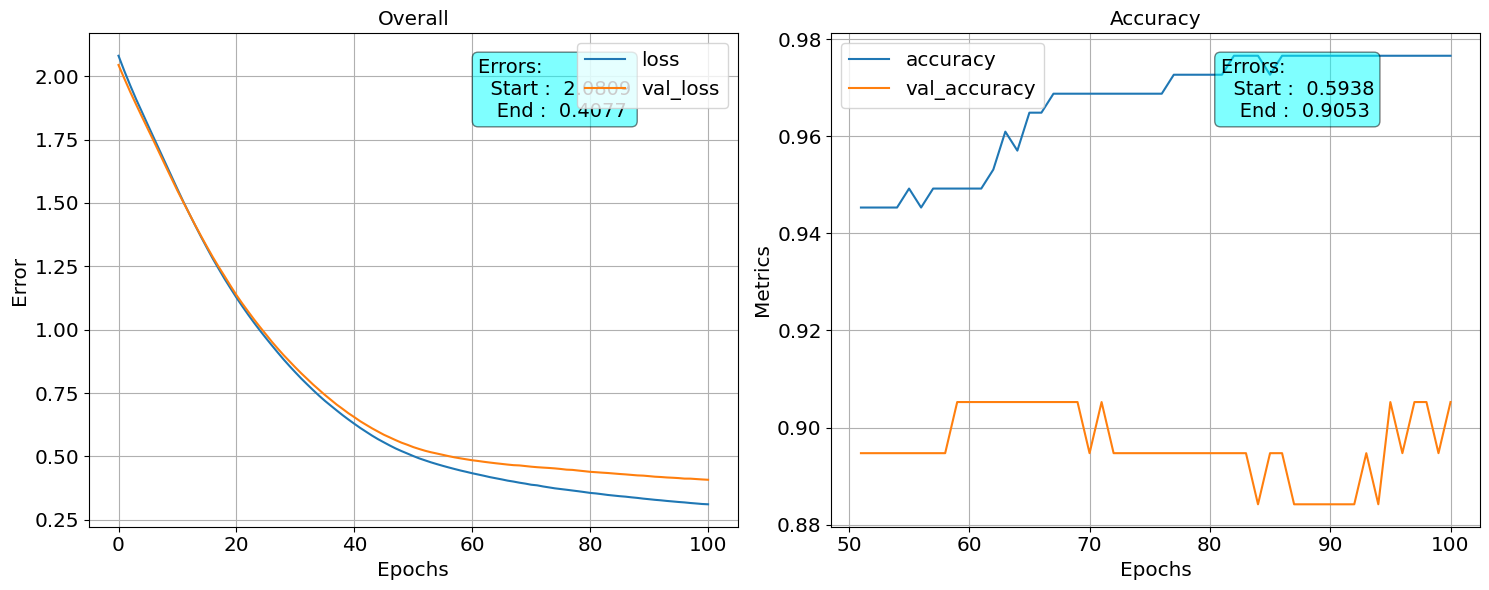

In [890]:
fig, axes = plt.subplots(1,2 , figsize = (15,6))

l_range = 50

ax = axes[0]
y1 = loss_df.columns[0]
y2 = loss_df.columns[2]

loss_df.plot( y = [y1, y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# properties  matplotlib.patch.Patch 
props = dict(boxstyle='round', facecolor='aqua', alpha=0.5)

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Error")
ax.set_title('Overall')
ax.grid();

ax = axes[1]
y1 = loss_df.columns[1]
y2 = loss_df.columns[3]
loss_df[-l_range:].plot( y = [y1, y2], ax = ax)

# little beautification
txtstr = "Errors: \n  Start : {:7.4f}\n   End : {:7.4f}".format(loss_df.iloc[0][y1],
                                                                loss_df.iloc[-1][y2]) #text to plot

# place a text box in upper left in axes coords

ax.text(0.6, 0.95, txtstr, transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

ax.set_xlabel("Epochs")
ax.set_ylabel("Metrics")
ax.set_title(y1.capitalize())
ax.grid();
plt.tight_layout()

In [891]:
loss_df[loss_df['val_loss'] == loss_df['val_loss'].min()]

,loss,accuracy,val_loss,val_accuracy
100,0.310937,0.976562,0.407721,0.905263


In [892]:
# Chceckpoint
checkpointPath = os.path.join(modelDir, subDir)
checkpointPath

'.../models/ionosphere'

In [893]:
model_check_point = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpointPath,
    save_weights_only = True,
    save_best_only = True,
    monitor = 'val_loss',
    verbose = 1
)

es_check_point = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=PATIENCE,
    verbose=1,
    restore_best_weights=True,
    start_from_epoch=0,
)


In [894]:
history = model.fit(X_train, y_train, 
                    validation_data=[X_test, y_test],
                    epochs=EPOCHS,
                    verbose=2,
                    batch_size=BATCH_SIZE,
                    callbacks=[model_check_point, es_check_point ]
                    )

Epoch 1/101

Epoch 1: val_loss improved from inf to 0.40657, saving model to .../models/ionosphere
8/8 - 0s - loss: 0.3088 - accuracy: 0.9766 - val_loss: 0.4066 - val_accuracy: 0.9053 - 357ms/epoch - 45ms/step
Epoch 2/101

Epoch 2: val_loss improved from 0.40657 to 0.40503, saving model to .../models/ionosphere
8/8 - 0s - loss: 0.3074 - accuracy: 0.9766 - val_loss: 0.4050 - val_accuracy: 0.8947 - 251ms/epoch - 31ms/step
Epoch 3/101

Epoch 3: val_loss improved from 0.40503 to 0.40439, saving model to .../models/ionosphere
8/8 - 0s - loss: 0.3057 - accuracy: 0.9766 - val_loss: 0.4044 - val_accuracy: 0.8947 - 139ms/epoch - 17ms/step
Epoch 4/101

Epoch 4: val_loss improved from 0.40439 to 0.40256, saving model to .../models/ionosphere
8/8 - 0s - loss: 0.3044 - accuracy: 0.9766 - val_loss: 0.4026 - val_accuracy: 0.9053 - 148ms/epoch - 18ms/step
Epoch 5/101

Epoch 5: val_loss improved from 0.40256 to 0.40243, saving model to .../models/ionosphere
8/8 - 0s - loss: 0.3026 - accuracy: 0.9766 - 

In [895]:
model.evaluate(X_train, y_train)

8/8 [==============================] - 0s 7ms/step - loss: 0.2642 - accuracy: 0.9805


[0.26417410373687744, 0.98046875]

In [896]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 5ms/step - loss: 0.3800 - accuracy: 0.8947


[0.37996652722358704, 0.8947368264198303]

In [897]:
savePath = os.path.join(modelDir, subDir, 'vanila')
tf.keras.models.save_model(model, savePath)

INFO:tensorflow:Assets written to: .../models/ionosphere/vanila/assets


INFO:tensorflow:Assets written to: .../models/ionosphere/vanila/assets


In [898]:
del model

In [899]:
#model.summary()

In [900]:
model1 = tf.keras.models.load_model(savePath)
model1.summary()

Model: "model_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_34 (InputLayer)       [(None, 34)]              0         
                                                                 
 dense_99 (Dense)            (None, 18)                630       
                                                                 
 dense_100 (Dense)           (None, 9)                 171       
                                                                 
 dense_101 (Dense)           (None, 2)                 20        
                                                                 
Total params: 821
Trainable params: 821
Non-trainable params: 0
_________________________________________________________________


In [901]:
input_layer = tf.keras.Input(shape=(33,))

x = tf.keras.layers.Dense(18, activation='swish',
                          kernel_regularizer = knl_reg ) (input_layer)

x = tf.keras.layers.Dense(9, activation='swish',
                          kernel_regularizer = knl_reg ) (x)

output_layer = tf.keras.layers.Dense(2) (x)

model = tf.keras.Model(inputs= input_layer, outputs = output_layer)

model.summary()

Model: "model_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_35 (InputLayer)       [(None, 33)]              0         
                                                                 
 dense_102 (Dense)           (None, 18)                612       
                                                                 
 dense_103 (Dense)           (None, 9)                 171       
                                                                 
 dense_104 (Dense)           (None, 2)                 20        
                                                                 
Total params: 803
Trainable params: 803
Non-trainable params: 0
_________________________________________________________________


In [902]:
model.load_weights(checkpointPath)

ValueError: Received incompatible tensor with shape (34, 18) when attempting to restore variable with shape (33, 18) and name dense_102/kernel:0.

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam', 
              loss=loss_function,
              metrics=['accuracy'])

model.evaluate(X_test, y_test)